# Path Test Between Fingers on Right Hand
**NOTE** This only works with Python versions between 3.5-3.9 because of the dependency on polyscope.

## Import libraries

In [1]:
import potpourri3d as pp3d
import polyscope as ps
import numpy as np

## Start Polyscope to visualize the mesh

In [2]:
ps.init()

## Import in the right hand

In [3]:
V, F = pp3d.read_mesh("../Models/Right Arm UV Mapped.obj")

## Add the surface mesh to Polyscope

In [4]:
ps_mesh = ps.register_surface_mesh("mesh", V, F)

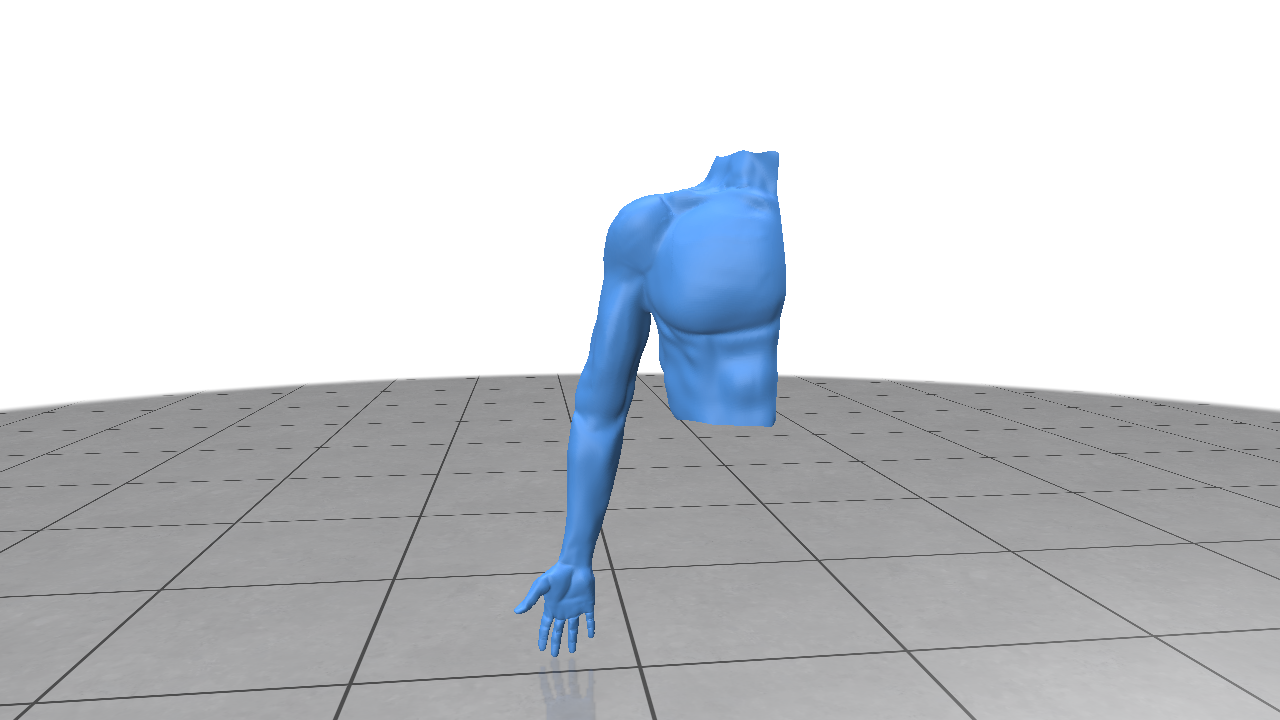

## Set up a stateful solver
This is much faster on repeated computations

In [5]:
solver = pp3d.MeshHeatMethodDistanceSolver(V,F)

## Find the distance between the hand and the chest by their vertex number
I found these by guessing, but there needs to be code to select locations by centroid

In [6]:
source_verticies = [15_000, 30_000]
dist = solver.compute_distance_multisource(source_verticies)

## Add Distances to the visualization

In [8]:
ps_mesh.add_scalar_quantity("dist", dist, enabled = True)

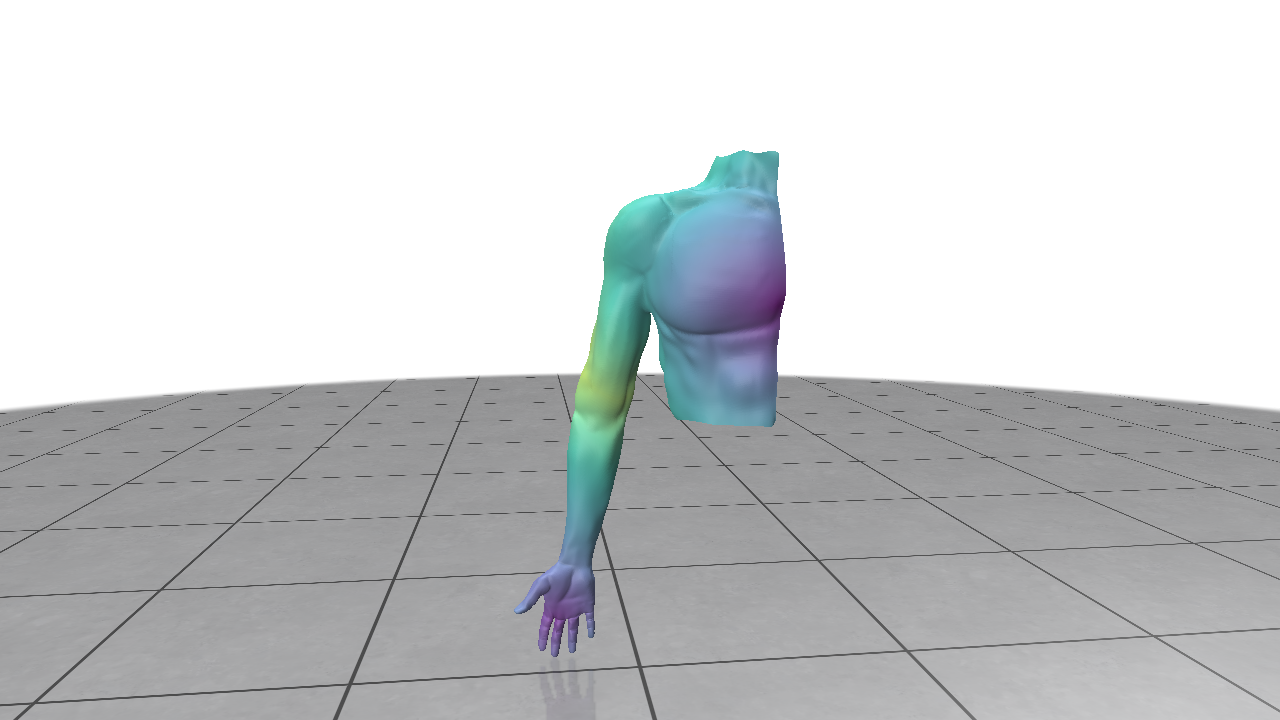

## Find paths between source points above

In [10]:
# Flip geodesics
path_solver = pp3d.EdgeFlipGeodesicSolver(V,F)

path_points = path_solver.find_geodesic_path(source_verticies[0], source_verticies[1])

## Add path to the visualization

In [11]:
ps.register_curve_network("Geodesic Path", path_points, edges='line')

## Show the visualization

In [12]:
ps.show()

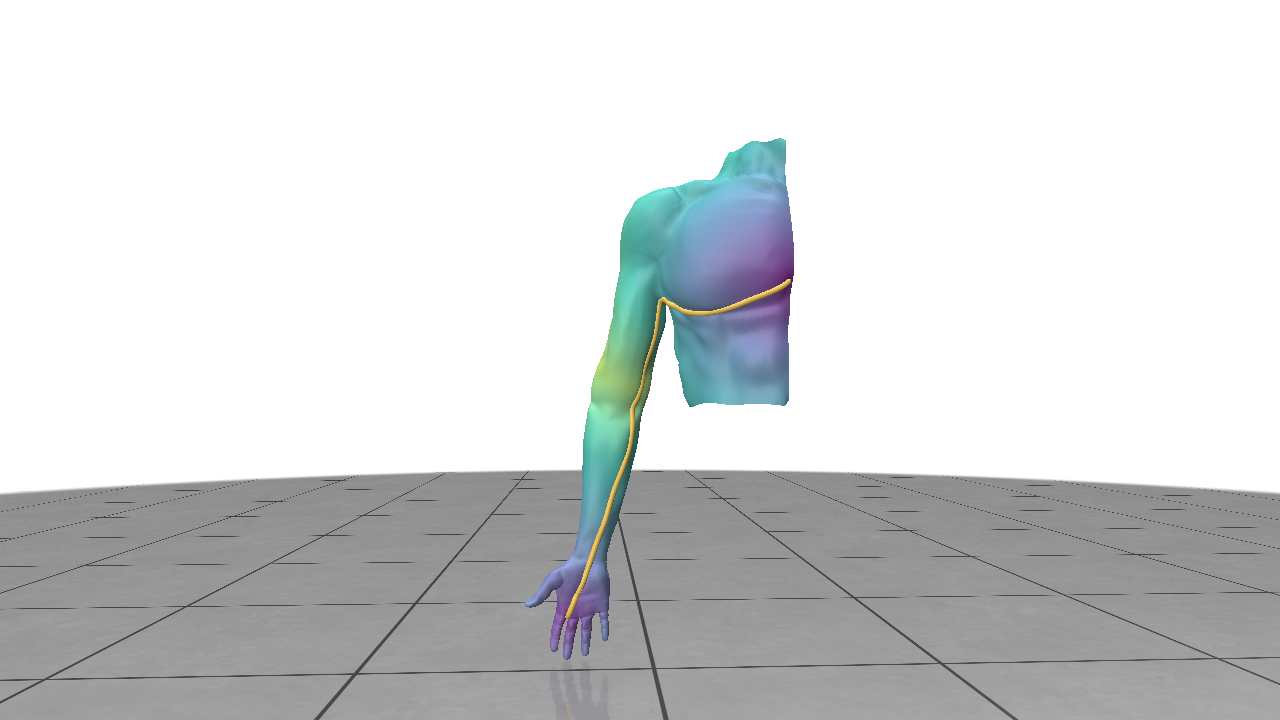